In [1]:
from scipy import ndimage
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def discrete_radon_transform(img, steps = 180):
    # crate matrix
    w, h = img.shape
    zero = np.zeros((h, steps), dtype='float64')
    # roatate
    for s in range(steps):
        rotation = ndimage.rotate(img, s, reshape=False).astype('float')
    # sum
        zero[:, s] = np.sum(rotation, axis=0)
    # rotate image
    zero = ndimage.rotate(zero, 180, reshape=False).astype('float')
    return zero

In [3]:
def calculate_rotate_h(img):
    r = np.array([np.sqrt(np.mean(line ** 2)) for line in sinogram.T])
    rotation = np.argmax(r)
    angle = 90 - rotation
    print(f'Rotation H: {angle} degrees')
    return angle
    
def calculate_rotate_v(img):
    r = np.array([np.sqrt(np.mean(line ** 2)) for line in sinogram.T])
    rotation = np.argmax(r)
    angle = rotation
    print(f'Rotation V: {angle} degrees')
    return angle

def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

In [4]:
def cv_rgb2gray(rgb):
    gray = np.mean(rgb, axis=2)
    return gray

def cv_binarization(gray_img, threshold = 100):
    binarized = 1.0 * (gray_img > threshold)
    return binarized

def cv_opening(img, kernel, iter_erosion= 1, iter_dilatation = 1):
    img = cv2.erode(img, kernel, iter_erosion)
    img = cv2.dilate(img, kernel, iter_dilatation)
    return img

def cv_closing(img, kernel, iter_erosion= 1, iter_dilatation = 1):
    img = cv2.dilate(img, kernel, iter_dilatation)
    img = cv2.erode(img, kernel, iter_erosion)
    return img

def kernel_square(n):
    kernel  = np.ones((n, n),np.uint8)
    return kernel

def kernel_unique(n, m):
    kernel  = np.ones((n, m),np.uint8)
    return kernel

In [5]:
def view(img):
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap='gray')

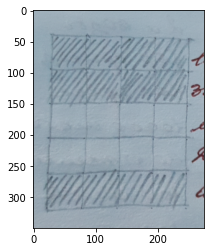

In [6]:
img = cv2.imread("./DATA/1.jpg")
img = img[500: 850, 100:375]
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

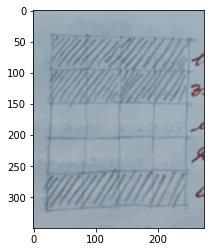

In [7]:
blur = cv2.blur(img, (3, 3))
plt.imshow(blur, cmap='gray')

In [8]:
thresh1 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 3)

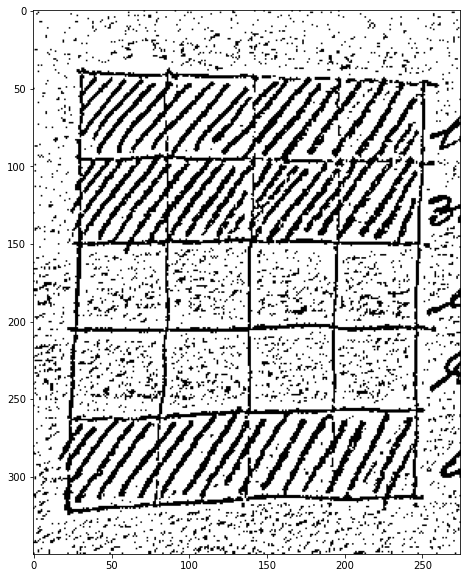

In [9]:
view(thresh1)

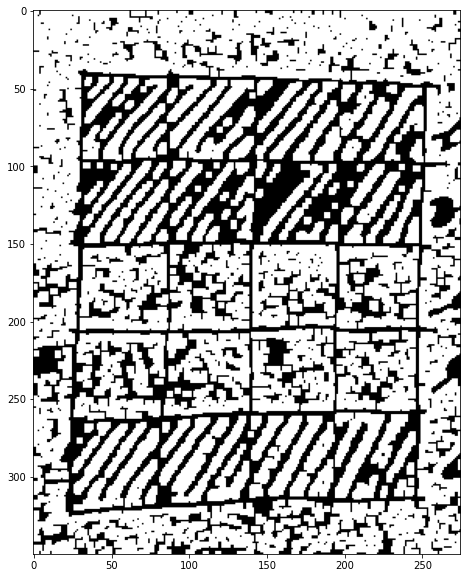

In [10]:
f1 = cv_opening(thresh1, kernel=kernel_unique(4, 4))
view(f1)

In [11]:
canny = cv2.Canny(f1, 50 , 150, apertureSize=5)
lines = cv2.HoughLinesP(canny, 1, np.pi / 180, 100, minLineLength=260, maxLineGap=50)

In [12]:
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 255), 2)

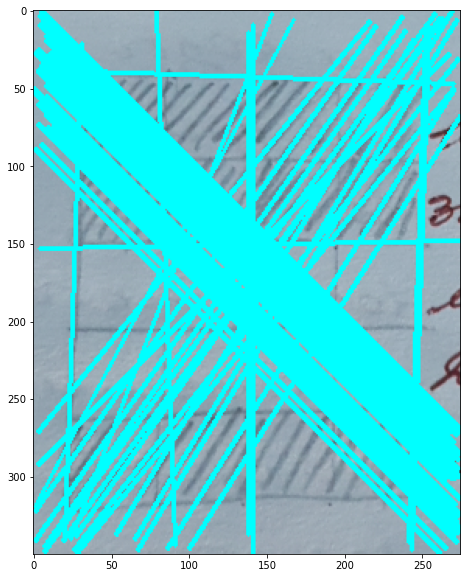

In [13]:
view(img)